In [41]:
import pandas as pd
import numpy as np

In [42]:
df=pd.read_csv('titanic_train.csv')

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df=df.drop(columns='Cabin', axis=1)

In [47]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [48]:
# finding the mode value of "Embarked" column
print(df['Embarked'].mode())

0    S
dtype: object


In [49]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [50]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
#number of people survived and not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Survived', ylabel='count'>

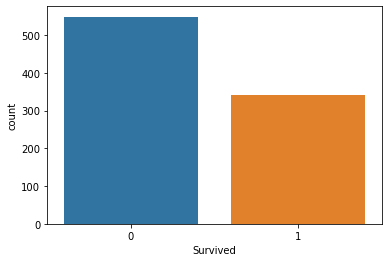

In [54]:
sns.countplot('Survived', data=df)

In [55]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

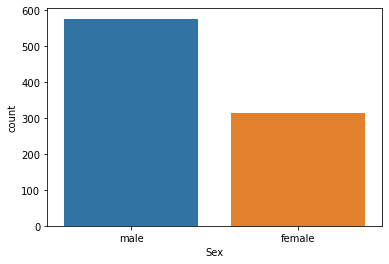

In [56]:
sns.countplot('Sex', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

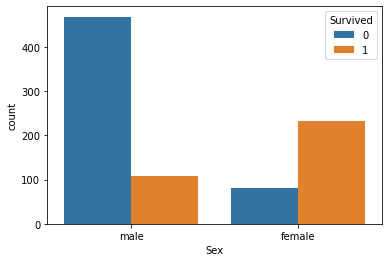

In [57]:
sns.countplot('Sex', hue='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

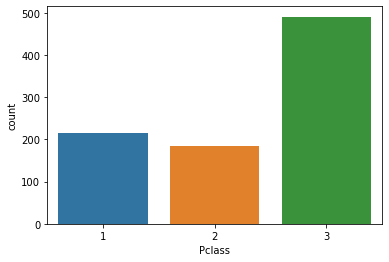

In [58]:
sns.countplot('Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

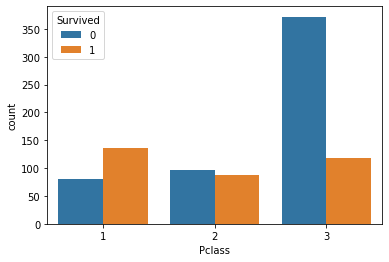

In [59]:
sns.countplot('Pclass', hue='Survived', data=df)

# Encoding

### Encoding the Categorical Columns

In [60]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [61]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [63]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [65]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

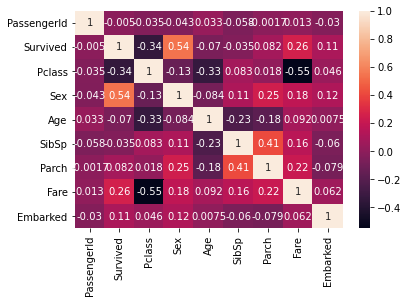

In [67]:
sns.heatmap(df.corr(),annot=True)

# Separating features and Target

In [69]:
x = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = df['Survived']

In [70]:
#checking skewness
x.skew()

Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

we can see skewness in most of our dataset, we will remove the skewness using power_transform function

In [71]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x=pd.DataFrame(x_new,columns=x.columns)

In [72]:
x.skew()

Pclass     -0.441438
Sex         0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked    1.013716
dtype: float64

# checking outliers

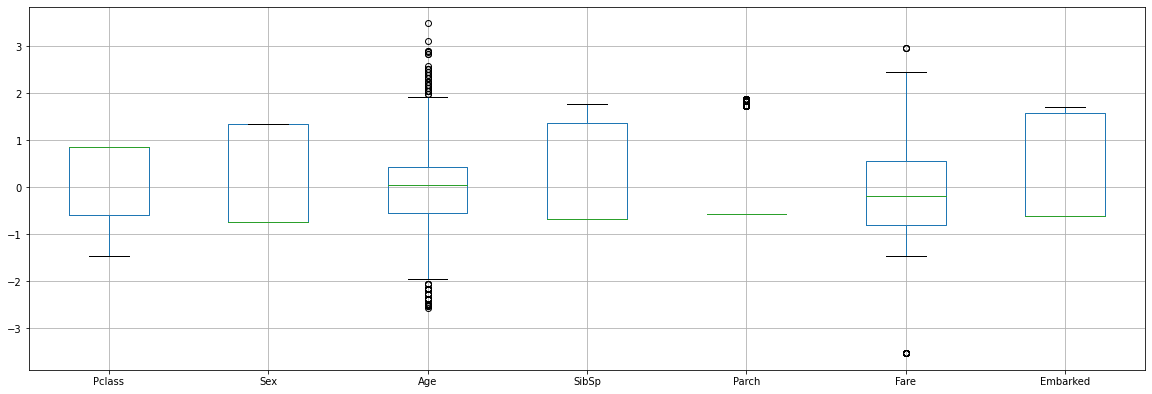

In [73]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# finding best random state

In [75]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on random state",maxRS)

Best accuracy is  0.8715083798882681 on random state 417


# Creating train test Split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=417)

In [77]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 87.15083798882681
[[107   8]
 [ 15  49]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       115
           1       0.86      0.77      0.81        64

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179

